In [1]:
import pandas as pd
preprocessed_dataset=pd.read_csv("../Datasets/Clustering/Bank Customer Segmentation/preprocessed_dataset.csv")

### Feature Selection

Here we are using Feature selection using Correelation

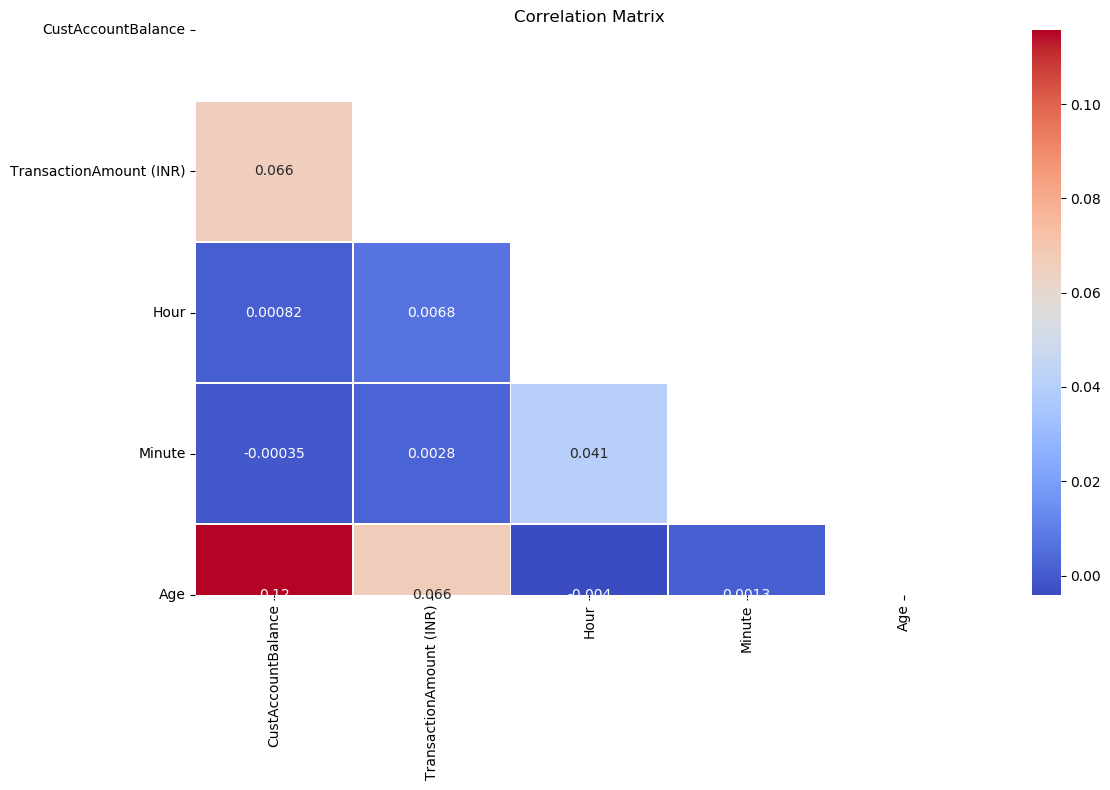

Highly correlated features: Series([], dtype: float64)


In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = preprocessed_dataset.corr()

# Mask the upper triangle (correlation matrix is symmetrical)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Identify highly correlated features to drop (above threshold, e.g., 0.9)
threshold = 0.9
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]  # Remove 1 as it's the correlation of feature with itself

# Print highly correlated feature pairs
print("Highly correlated features:", high_corr)


#### The result Series([], dtype: float64) indicates that there are no highly correlated features with a correlation above the threshold you set (0.9). This means that your features are not highly correlated with each other, which is good because it ensures that there is no multicollinearity in your data for clustering.

### Standardization

In [3]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(preprocessed_dataset.select_dtypes(include=['float64', 'int64']))


### Model Creation

In [4]:
from sklearn.cluster import KMeans

# Apply K-Means clustering (you can adjust n_clusters)
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(df_scaled)

# Add the cluster labels to the dataset
preprocessed_dataset['Cluster'] = kmeans.labels_


### Visualizing Clusters with PCA

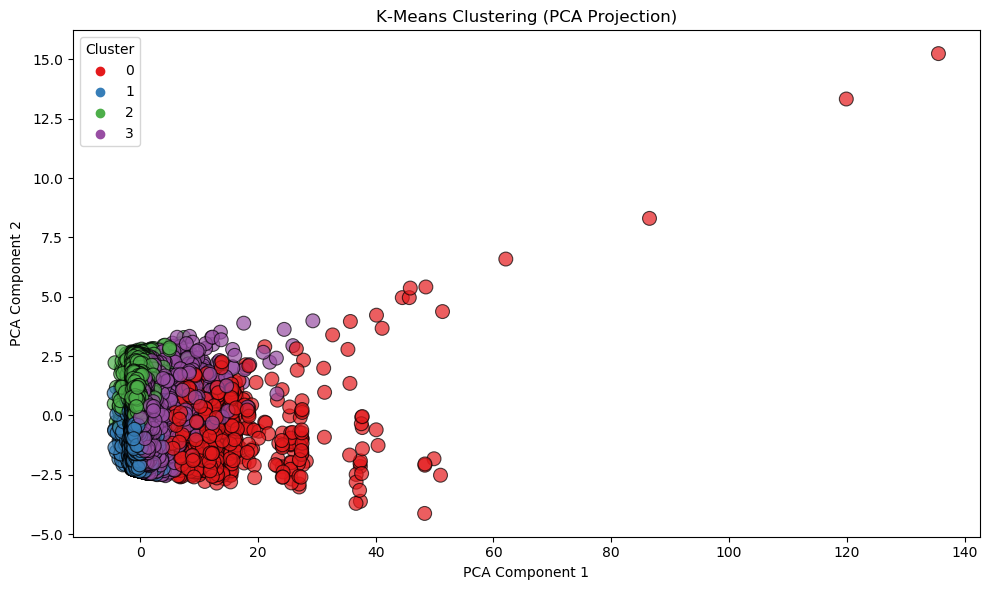

In [5]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization (using PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, edgecolor='black', alpha=0.7)
plt.title('K-Means Clustering (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [6]:
for cluster_id in sorted(preprocessed_dataset['Cluster'].unique()):
    cluster_data = preprocessed_dataset[preprocessed_dataset['Cluster'] == cluster_id]
    
    # Transaction Amount Range
    txn_min = cluster_data['TransactionAmount (INR)'].min()
    txn_max = cluster_data['TransactionAmount (INR)'].max()
    
    # Age info
    age_min = cluster_data['Age'].min()
    age_max = cluster_data['Age'].max()
    avg_age = cluster_data['Age'].mean().round(1)
    
    # Most common customer location
    top_location = cluster_data['CustLocation'].mode().iloc[0]
    
    print(f"Cluster {cluster_id}:")
    print(f"  • Transaction Amount Range: ₹{txn_min:.0f} - ₹{txn_max:.0f}")
    print(f"  • Customer Age: Avg ≈ {avg_age} years (Range: {age_min}-{age_max})")
    print(f"  • Dominant Location: {top_location}")
    print("-" * 60)



Cluster 0:
  • Transaction Amount Range: ₹0 - ₹1560035
  • Customer Age: Avg ≈ 42.6 years (Range: 1-50)
  • Dominant Location: MUMBAI
------------------------------------------------------------
Cluster 1:
  • Transaction Amount Range: ₹0 - ₹100742
  • Customer Age: Avg ≈ 34.9 years (Range: 2-43)
  • Dominant Location: MUMBAI
------------------------------------------------------------
Cluster 2:
  • Transaction Amount Range: ₹0 - ₹100000
  • Customer Age: Avg ≈ 34.9 years (Range: 0-43)
  • Dominant Location: MUMBAI
------------------------------------------------------------
Cluster 3:
  • Transaction Amount Range: ₹0 - ₹346004
  • Customer Age: Avg ≈ 44.1 years (Range: 30-50)
  • Dominant Location: MUMBAI
------------------------------------------------------------


### Evaluation of the model

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# If data is too large, sample it for silhouette
SAMPLE_SIZE = 10000
if df_scaled.shape[0] > SAMPLE_SIZE:
    sample_idx = np.random.choice(df_scaled.shape[0], size=SAMPLE_SIZE, replace=False)
    sample_data = df_scaled[sample_idx]
    sample_labels = kmeans.labels_[sample_idx]
else:
    sample_data = df_scaled
    sample_labels = kmeans.labels_

# Evaluation Metrics
silhouette = silhouette_score(sample_data, sample_labels)
davies = davies_bouldin_score(df_scaled, kmeans.labels_)
calinski = calinski_harabasz_score(df_scaled, kmeans.labels_)

# Print Results
print(f"✅ Silhouette Score         : {silhouette:.4f} (Higher is better)")
print(f"✅ Davies-Bouldin Score     : {davies:.4f} (Lower is better)")
print(f"✅ Calinski-Harabasz Score  : {calinski:.2f} (Higher is better)")



✅ Silhouette Score         : 0.2256 (Higher is better)
✅ Davies-Bouldin Score     : 1.2541 (Lower is better)
✅ Calinski-Harabasz Score  : 116970.68 (Higher is better)
